<a href="https://colab.research.google.com/github/thorjy/SC1015-Mini-Project/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import pandas as pd
import seaborn as sns # visualize
import matplotlib.pyplot as plt
import numpy as np
dataMath = pd.read_csv('/content/gdrive/My Drive/SC1015/student-mat.csv')
dataPort = pd.read_csv('/content/gdrive/My Drive/SC1015/student-por.csv')

In [4]:
dataMath.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
dataMath.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Looking through the datasets, there are many variables that could potentially contribute to a students grade. As students, we all know how sensitive yet important our grades are. Hence our chosen problem definition is:

# How can we optimise the environment to improve Students’ Grades?


In addition to our main problem definition, we have derived a few sub problems that serves to help us get on the right track and help answer our main problem. They are :
#1)What are the factors that are important in determining our grades?
#2)How can we sieve out students who are in need of help?



# EDA

In [6]:
dataMath.nunique(axis=0)

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

Looking at the number of unique variables, it appears most variablers are under some form of category and if numerical, do not have much variation. Thus we will not need to do any normalisation.

In [7]:
dataMath.rename(columns={'G1':'G1_Mat', 'G2':'G2_Mat', 'G3':'G3_Mat'}, inplace=True)
dataPort.rename(columns={'G1':'G1_Por', 'G2':'G2_Por', 'G3':'G3_Por'}, inplace=True)
combination = dataMath.merge(right = dataPort, on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet","guardian","activities","romantic","Dalc","Walc","health","traveltime","schoolsup","famsup","higher","famrel","goout","freetime"])
combination = combination.drop_duplicates()
combination.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 369
Data columns (total 40 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   school       370 non-null    object
 1   sex          370 non-null    object
 2   age          370 non-null    int64 
 3   address      370 non-null    object
 4   famsize      370 non-null    object
 5   Pstatus      370 non-null    object
 6   Medu         370 non-null    int64 
 7   Fedu         370 non-null    int64 
 8   Mjob         370 non-null    object
 9   Fjob         370 non-null    object
 10  reason       370 non-null    object
 11  guardian     370 non-null    object
 12  traveltime   370 non-null    int64 
 13  studytime_x  370 non-null    int64 
 14  failures_x   370 non-null    int64 
 15  schoolsup    370 non-null    object
 16  famsup       370 non-null    object
 17  paid_x       370 non-null    object
 18  activities   370 non-null    object
 19  nursery      370 non-null    

Merging columns

In [8]:
combination['total_studytime'] = combination['studytime_x'] + combination['studytime_y']
combination['total_failures'] = combination['failures_x'] + combination['failures_y']
combination['total_absences'] = combination['absences_x'] + combination ['absences_y']
combination['paid_x'] = combination['paid_x'].replace({'yes':1,'no':0})
combination['paid_y'] = combination['paid_y'].replace({'yes':1,'no':0})
combination['total_paid'] = combination['paid_x'] + combination['paid_y']
combination['total_grades_G1'] = combination['G1_Mat'] + combination['G1_Por']
combination['total_grades_G2'] = combination['G2_Mat'] + combination['G2_Por']
combination['total_grades_G3'] = combination['G3_Mat'] + combination['G3_Por'] 
combination['total_grades_math'] = combination['G1_Mat'] + combination['G2_Mat'] + combination['G3_Mat']
combination['total_grades_port'] = combination['G1_Por'] + combination['G2_Por'] + combination['G3_Por']
combination['overall_grades'] = combination['total_grades_port'] + combination['total_grades_math']


combination.drop(['studytime_x','studytime_y','failures_x','failures_y','absences_x','absences_y','paid_x','paid_y','G1_Mat','G2_Mat','G3_Mat','G1_Por','G2_Por','G3_Por'],axis=1,inplace=True) 
combination.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 369
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   school             370 non-null    object
 1   sex                370 non-null    object
 2   age                370 non-null    int64 
 3   address            370 non-null    object
 4   famsize            370 non-null    object
 5   Pstatus            370 non-null    object
 6   Medu               370 non-null    int64 
 7   Fedu               370 non-null    int64 
 8   Mjob               370 non-null    object
 9   Fjob               370 non-null    object
 10  reason             370 non-null    object
 11  guardian           370 non-null    object
 12  traveltime         370 non-null    int64 
 13  schoolsup          370 non-null    object
 14  famsup             370 non-null    object
 15  activities         370 non-null    object
 16  nursery            370 non-null    object
 1

# Cleaning the dataset
##### -Checking for outliers

In [9]:
print("Gender:")
combination.sex.value_counts()

Gender:


F    195
M    175
Name: sex, dtype: int64

<Axes: title={'center': 'Ages of Study (Mathematics)'}>

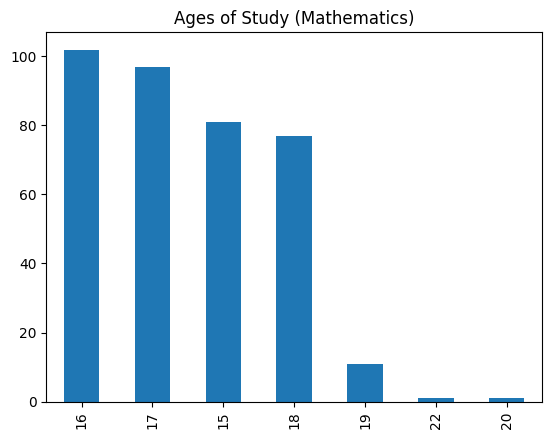

In [10]:
combination['age'].value_counts(sort = True).plot(kind = 'bar', title = 'Ages of Study (Mathematics)')

In [11]:
combination.age.value_counts()

16    102
17     97
15     81
18     77
19     11
22      1
20      1
Name: age, dtype: int64

Looking at the graph, we notice that there are very few 20-22 year old students. Going back to the dataset, we find out that it is based off on secondary school portugese students. 
Doing a quick google search, the typical age range of secondary school students is from 15 to 18. 

19 Year olds might just be some students who have retained a year or took a gap year, so let us leave them in.

<Axes: title={'center': 'Ages of Study (Mathematics)'}>

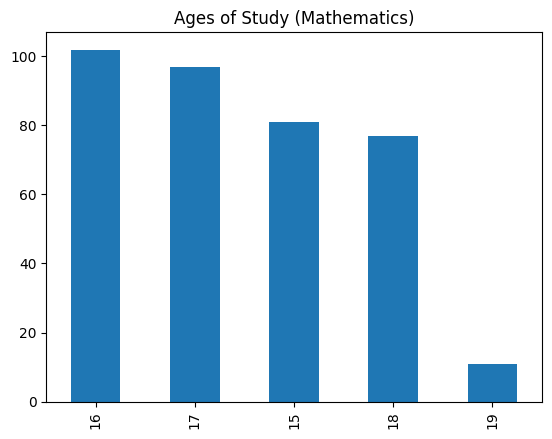

In [12]:
cleaned = combination.copy()
cleaned.drop(cleaned[cleaned['age'] > 19].index, inplace=True)
cleaned['age'].value_counts(sort = True).plot(kind = 'bar', title = 'Ages of Study (Mathematics)')

Looking through the columns of the dataset, there are some that do not seem to provide any relevance to family situation and the students environment. Lets remove them.

In [13]:
cleaned.drop(['school','guardian','sex','reason'], axis = 'columns', inplace = True)
cleaned = cleaned.dropna(axis=0)
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 369
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                368 non-null    int64 
 1   address            368 non-null    object
 2   famsize            368 non-null    object
 3   Pstatus            368 non-null    object
 4   Medu               368 non-null    int64 
 5   Fedu               368 non-null    int64 
 6   Mjob               368 non-null    object
 7   Fjob               368 non-null    object
 8   traveltime         368 non-null    int64 
 9   schoolsup          368 non-null    object
 10  famsup             368 non-null    object
 11  activities         368 non-null    object
 12  nursery            368 non-null    object
 13  higher             368 non-null    object
 14  internet           368 non-null    object
 15  romantic           368 non-null    object
 16  famrel             368 non-null    int64 
 1

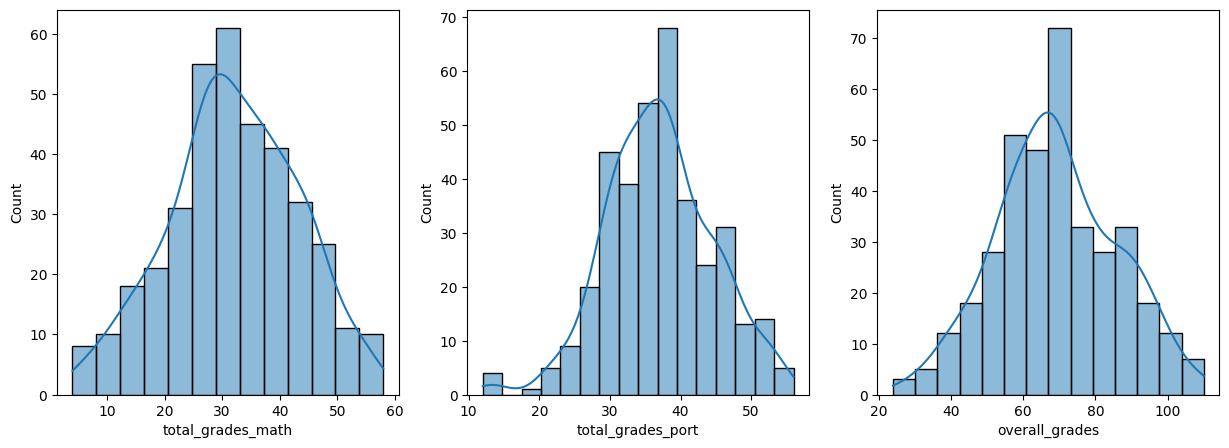

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))
sns.histplot( data=cleaned['total_grades_math'],  ax = ax1, kde=True)
sns.histplot( data=cleaned['total_grades_port'], ax = ax2, kde=True)
sns.histplot( data=cleaned['overall_grades'], ax = ax3, kde=True)
plt.show()

### We do a quick correlation check to see which variables to explore

In [15]:
cleaned.corr()['overall_grades'].sort_values(ascending=False)

<ipython-input-15-00a44a10e1ea>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cleaned.corr()['overall_grades'].sort_values(ascending=False)


overall_grades       1.000000
total_grades_G2      0.977776
total_grades_G3      0.970602
total_grades_G1      0.950925
total_grades_math    0.932469
total_grades_port    0.845648
Medu                 0.248417
total_studytime      0.202565
Fedu                 0.197103
total_paid           0.053341
famrel               0.014208
freetime            -0.053695
total_absences      -0.116446
age                 -0.139129
Walc                -0.141845
health              -0.145353
Dalc                -0.150311
goout               -0.151400
traveltime          -0.174878
total_failures      -0.396630
Name: overall_grades, dtype: float64

## Lets look at the variables that are the most interesting and those that have high correlation to overall grades

# EDA

### Total Failures

<Axes: xlabel='total_failures', ylabel='overall_grades'>

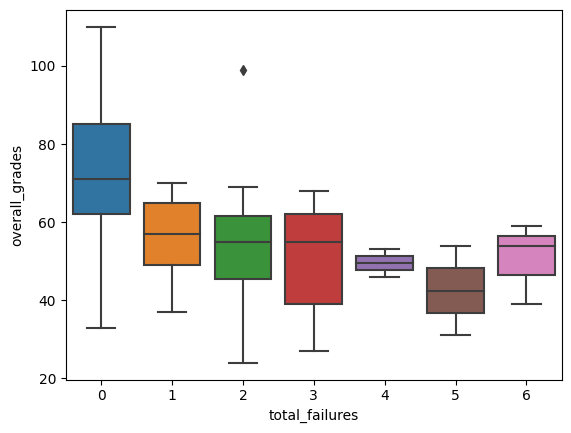

In [16]:
sns.boxplot(x= cleaned['total_failures'], y = cleaned['overall_grades'])

Evidently, students who have failed previous classes tend to do worse than their peers who have not failed. Perhaps identifying these students and paying more attention to them would help to improve their grades.

### Alcohol

Now we combine Daily alcohol consumption and Weekly alcohol consumption

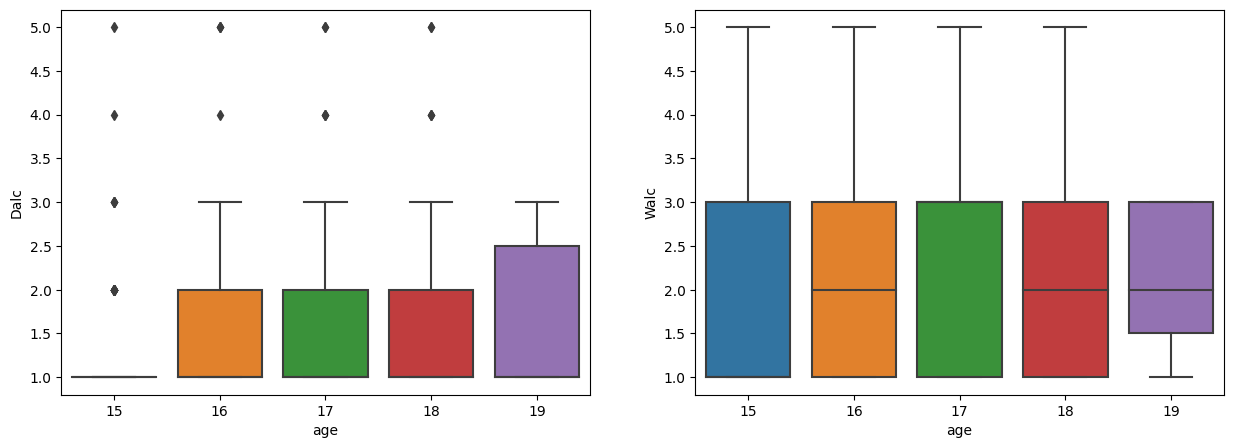

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
sns.boxplot(x= cleaned['age'], y = cleaned['Dalc'], ax = ax1)
sns.boxplot(x= cleaned['age'], y = cleaned['Walc'], ax = ax2)
plt.show()

<Axes: xlabel='age', ylabel='weekly'>

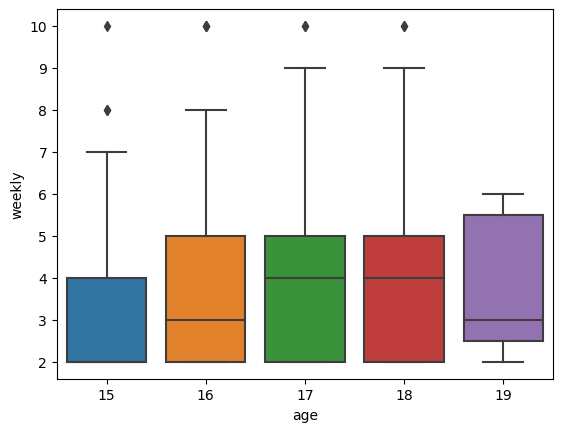

In [18]:
cleaned['weekly'] = cleaned['Dalc'] + cleaned['Walc']
cleaned.drop(['Dalc','Walc'],axis=1,inplace=True)
sns.boxplot(x=cleaned['age'],y=cleaned['weekly'],data = cleaned)

From observation, it can be seen that weekly alcohol consumption always starts from 2. 

But based on the data set, it is because students indicate a value of 1 on their alcohol consumption for weekday and weekend consumption, which represents very low. 

(According to column description)

Lets change the values so it is clearer.

<Axes: xlabel='age', ylabel='weekly'>

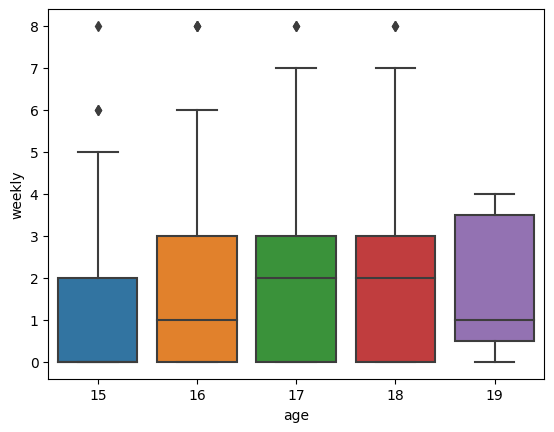

In [19]:
cleaned['weekly'] = cleaned['weekly'].replace({2:0,3:1,4:2,5:3,6:4,7:5,8:6,9:7,10:8})
sns.boxplot(x=cleaned['age'],y=cleaned['weekly'],data = cleaned)

It appears that most students do not much consume much alcohol. It is most likely due to the fact that the legal age of alcohol consumption in portugal is 18, but students aged 16 can consume beer and wine in a restaurant. Students aged 15 also appear to consume alcohol, as it is legal to consume alcohol while under parents supervision.

<Axes: xlabel='weekly', ylabel='overall_grades'>

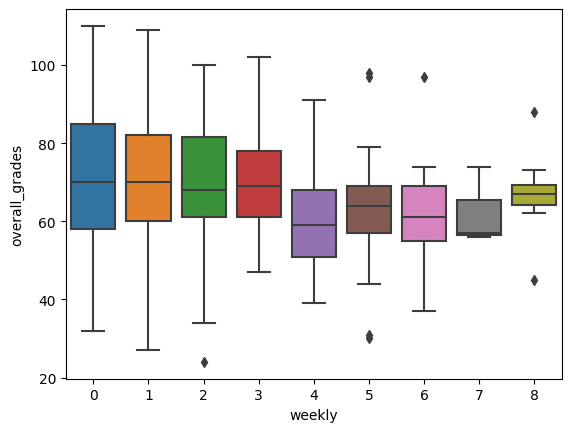

In [20]:
sns.boxplot(x=cleaned['weekly'],y=cleaned['overall_grades'],data = cleaned)

### Higher education

<Axes: xlabel='higher', ylabel='overall_grades'>

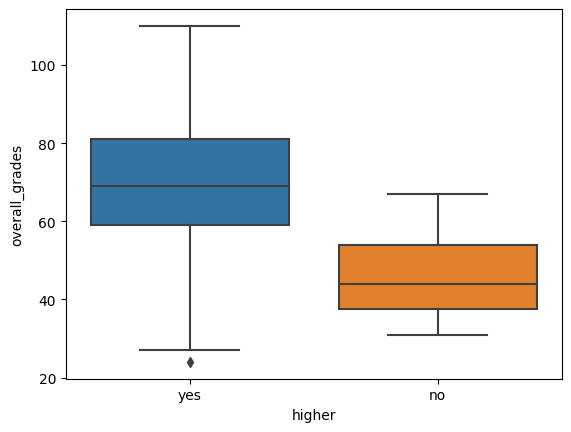

In [21]:
sns.boxplot(x= cleaned['higher'], y = cleaned['overall_grades'])

Evidently, you can see that students who are interested in higher education do end up doing better.

### Family status

What about parental status? would parents being seperated affect a childs grade?

<Axes: xlabel='Pstatus', ylabel='overall_grades'>

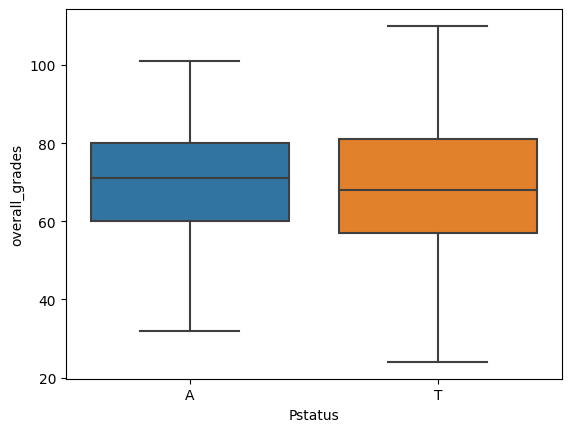

In [22]:
sns.boxplot(x= cleaned['Pstatus'], y = cleaned['overall_grades'])

Looking at the box plot, it appears that it does not have an effect on the mean grade of students.

What about the student's parents highest education?

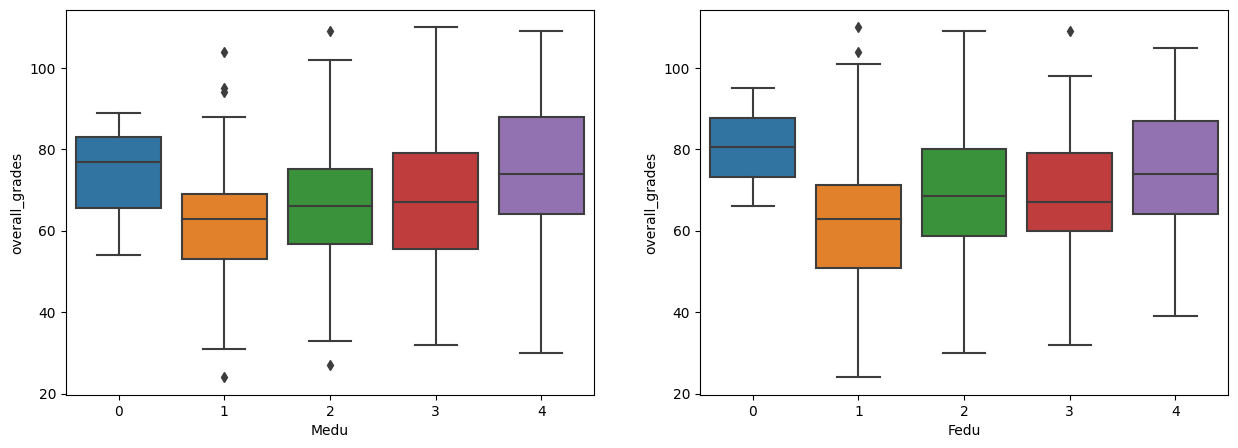

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
sns.boxplot(x= cleaned['Medu'], y = cleaned['overall_grades'], ax = ax1)
sns.boxplot(x= cleaned['Fedu'], y = cleaned['overall_grades'], ax = ax2)
plt.show()

Lets combine both to get a better picture

<Axes: xlabel='Pedu', ylabel='overall_grades'>

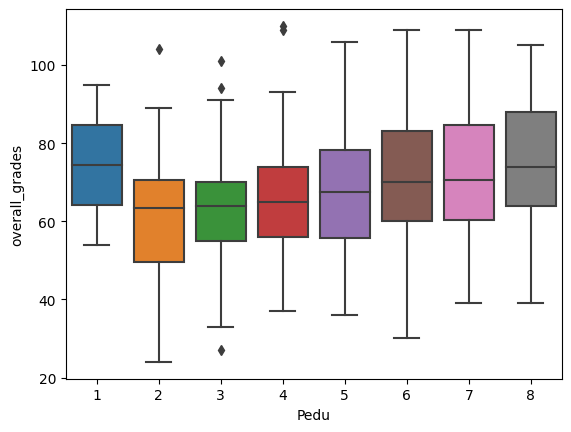

In [24]:
cleaned['Pedu'] = cleaned['Fedu'] + cleaned['Medu']
cleaned.drop(['Fedu','Medu'],axis=1,inplace=True)
sns.boxplot(x= cleaned['Pedu'], y = cleaned['overall_grades'])

It is observed that there is a positive correlation between parents education levels and a students total grades.

Family relationship

<Axes: xlabel='famrel', ylabel='overall_grades'>

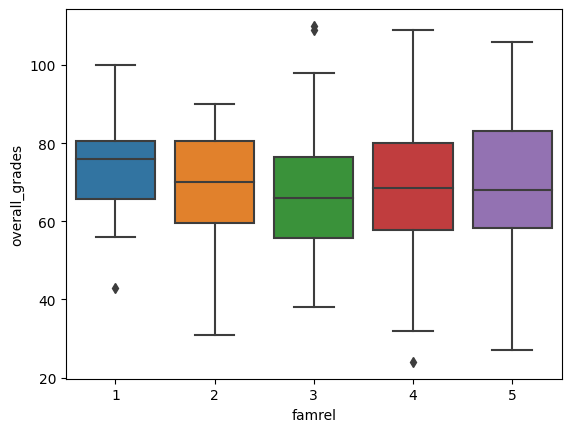

In [25]:
sns.boxplot(x= cleaned['famrel'], y = cleaned['overall_grades'])

### Address

<Axes: xlabel='address', ylabel='overall_grades'>

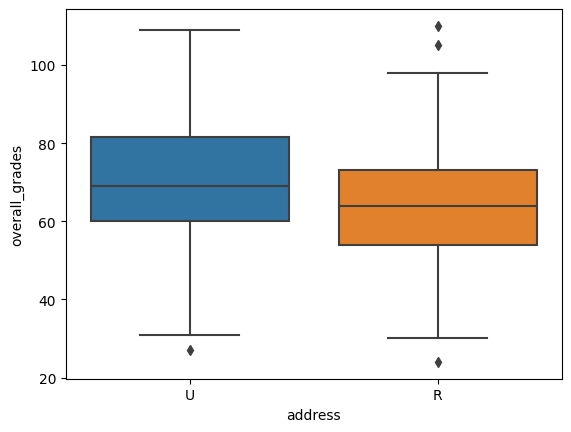

In [26]:
sns.boxplot(x=cleaned['address'],y=cleaned['overall_grades'])

Interesting, it appears that students who live in an urban location tend to do better in school

Lets check the relationship between students grades and their travel time

<Axes: xlabel='traveltime', ylabel='overall_grades'>

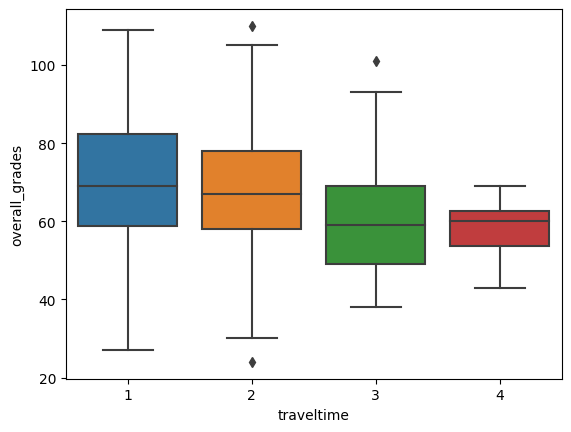

In [27]:
sns.boxplot(x=cleaned['traveltime'],y=cleaned['overall_grades'])

Students who live further away from school tend to do worse. Is it because they have less study time?

# Final cleaning

In [28]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 369
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                368 non-null    int64 
 1   address            368 non-null    object
 2   famsize            368 non-null    object
 3   Pstatus            368 non-null    object
 4   Mjob               368 non-null    object
 5   Fjob               368 non-null    object
 6   traveltime         368 non-null    int64 
 7   schoolsup          368 non-null    object
 8   famsup             368 non-null    object
 9   activities         368 non-null    object
 10  nursery            368 non-null    object
 11  higher             368 non-null    object
 12  internet           368 non-null    object
 13  romantic           368 non-null    object
 14  famrel             368 non-null    int64 
 15  freetime           368 non-null    int64 
 16  goout              368 non-null    int64 
 1

To make machine learning easier, we will change the categorical data to integers

In [29]:
cleaned['address'] = cleaned['address'].replace({'U':1,'R':0})
cleaned['famsize'] = cleaned['famsize'].replace({'GT3':1,'LE3':0})
cleaned['Pstatus'] = cleaned['Pstatus'].replace({'T':1,'A':0})
cleaned['schoolsup'] = cleaned['schoolsup'].replace({'yes':1,'no':0})
cleaned['famsup'] = cleaned['famsup'].replace({'yes':1,'no':0})
cleaned['activities'] = cleaned['activities'].replace({'yes':1,'no':0})
cleaned['nursery'] = cleaned['nursery'].replace({'yes':1,'no':0})
cleaned['higher'] = cleaned['higher'].replace({'yes':1,'no':0})
cleaned['internet'] = cleaned['internet'].replace({'yes':1,'no':0})
cleaned['romantic'] = cleaned['romantic'].replace({'yes':1,'no':0})

cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 369
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                368 non-null    int64 
 1   address            368 non-null    int64 
 2   famsize            368 non-null    int64 
 3   Pstatus            368 non-null    int64 
 4   Mjob               368 non-null    object
 5   Fjob               368 non-null    object
 6   traveltime         368 non-null    int64 
 7   schoolsup          368 non-null    int64 
 8   famsup             368 non-null    int64 
 9   activities         368 non-null    int64 
 10  nursery            368 non-null    int64 
 11  higher             368 non-null    int64 
 12  internet           368 non-null    int64 
 13  romantic           368 non-null    int64 
 14  famrel             368 non-null    int64 
 15  freetime           368 non-null    int64 
 16  goout              368 non-null    int64 
 1

#Machine Learning

**In this section, we will explore various models that could be used to pdetermine redict student's final grade**


#Prediction of student final grade, "overall_grades", using Linear Regression Model

Based on the heat map printed above, we are able to sieve out a few variables that have slight linear correlation with our target variable, "overall_grades". In the following codes, we will explore the linear regression models for the various variables namely "Medu", "Fedu", "G1", "G2", "Failure", and "study time". 

Using the model, we will then identify which variables are important in determining overall_grades.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import seaborn as sb
sb.set()
cleaned.head()

,age,address,famsize,Pstatus,Mjob,Fjob,traveltime,schoolsup,famsup,activities,...,total_absences,total_paid,total_grades_G1,total_grades_G2,total_grades_G3,total_grades_math,total_grades_port,overall_grades,weekly,Pedu
0,18,1,1,0,at_home,teacher,2,1,0,0,...,10,0,5,17,17,17,22,39,0,8
1,17,1,1,1,at_home,other,1,0,1,0,...,6,0,14,16,17,16,31,47,0,2
2,15,1,0,1,at_home,other,1,1,0,0,...,16,1,19,21,22,25,37,62,3,2
3,15,1,1,1,health,services,1,0,1,1,...,2,1,29,28,29,44,42,86,0,6
4,16,1,1,1,other,other,1,0,1,0,...,4,1,17,23,23,26,37,63,1,6


Crafting the Required Functions for efficiency:


In [31]:
def lr(X, y, df):
    
    
    X = pd.DataFrame(df[X])
    y = pd.DataFrame(df[y])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    model = LinearRegression()
    model.fit(X_train ,y_train)
    
    print('Intercept \t: b = ', model.intercept_)
    print('Coefficients \t: a = ', model.coef_)
    
    # Formula for the Regression line
    regline_x = X_train
    regline_y = model.intercept_ + model.coef_ * X_train
    
    # Predict Response corresponding to Predictors
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
   
    f, axes = plt.subplots(1, 2, figsize=(24, 12))

    axes[0].scatter(X_train, y_train, color = "blue")
    axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)
    axes[0].set_title("Regression for Training Set")
    
    axes[1].scatter(X_test, y_test, color = "green")
    axes[1].scatter(X_test, y_test_pred, color = "red")
    axes[1].set_title("Model Prediction for Testing Set")
    plt.show()

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", model.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", model.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()
    
# function to test goodness of fit using the Test Set
def gof_func(predictor, response):
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(
        predictor, response, test_size=0.20
    )

    # Linear Regression using Train Data
    linreg = LinearRegression()  # create the linear regression object
    linreg.fit(X_train, y_train)  # train the linear regression model

    # Predict SalePrice values corresponding to predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Mean Squared Error (MSE)
    def mean_sq_err(actual, predicted):
        """Returns the Mean Squared Error of actual and predicted values"""
        return np.mean(np.square(np.array(actual) - np.array(predicted)))

    mse = mean_sq_err(y_test, y_test_pred)
    print("Mean Squared Error (MSE) \t:", mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

First, we will be making a model of "Medu" against "overall_grades":

Intercept 	: b =  [57.86435124]
Coefficients 	: a =  [[2.12220278]]


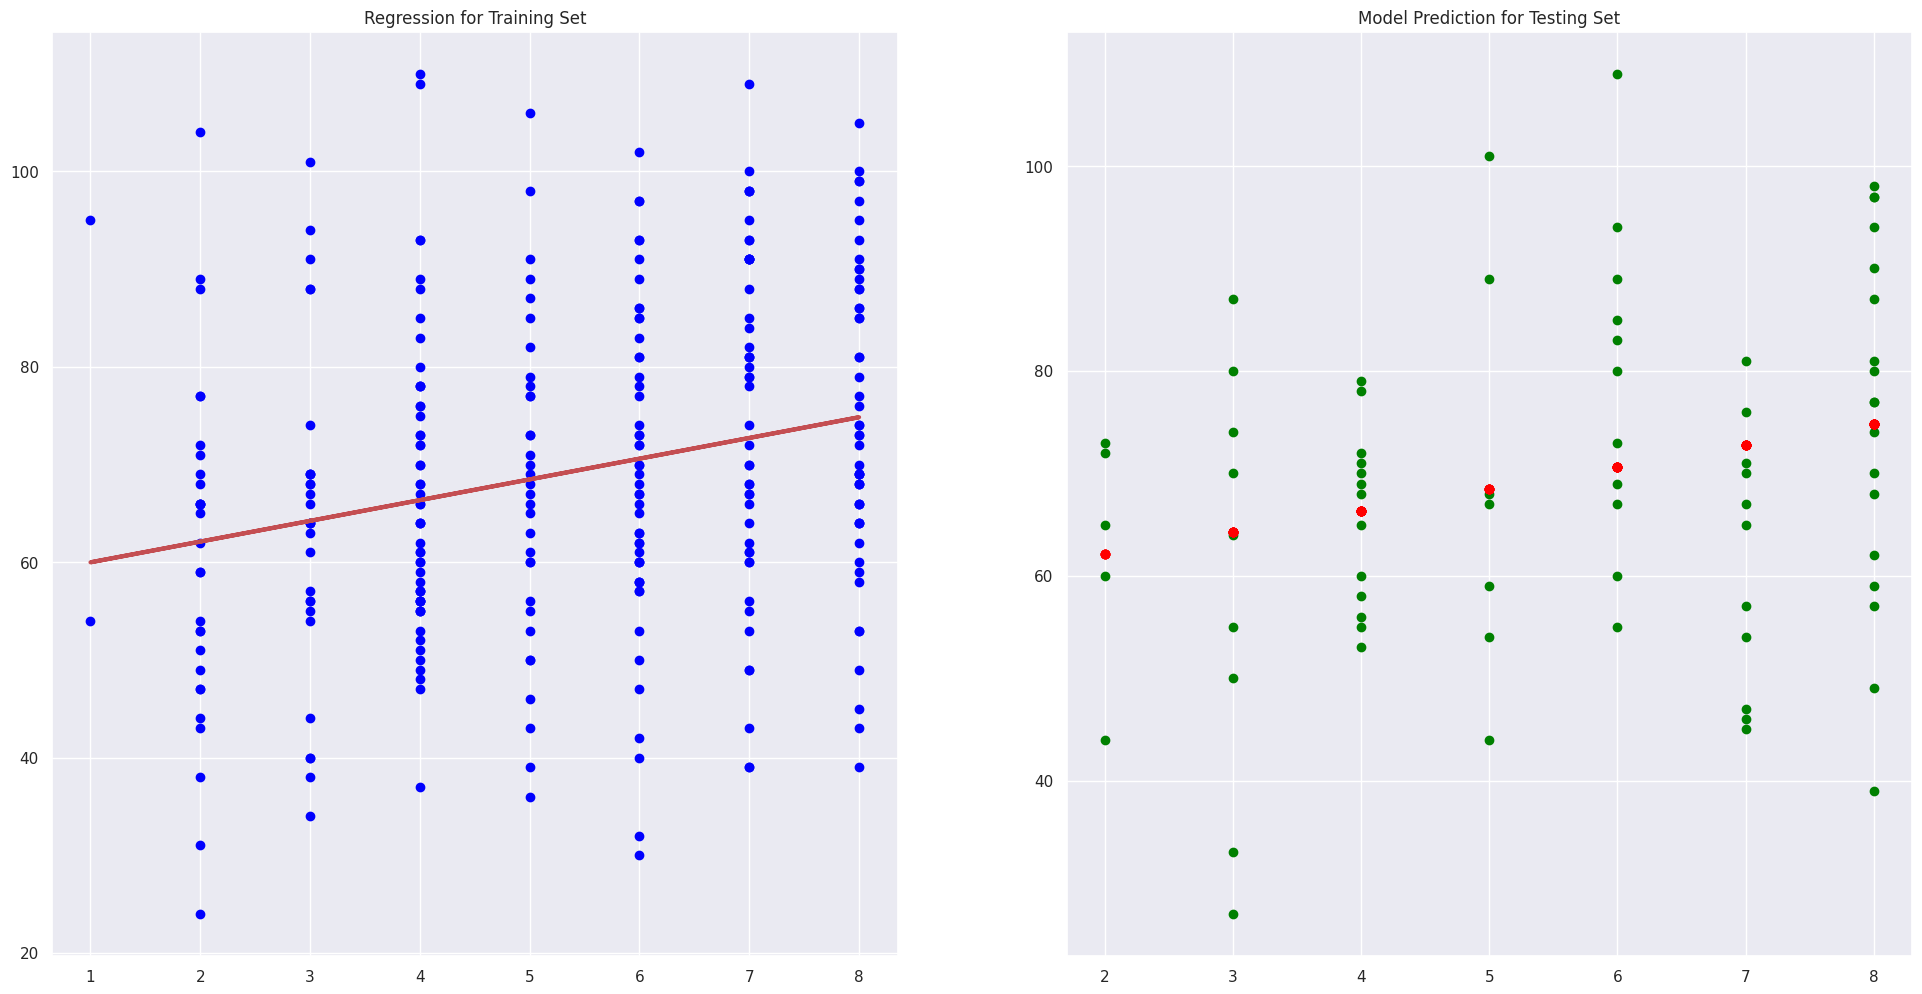

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.06066238284917913
Mean Squared Error (MSE) 	: 267.3830352165006

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.05908817206361505
Mean Squared Error (MSE) 	: 251.1610857081125



In [32]:
lr(X='Pedu', y='overall_grades', df=cleaned)


Model of "studytime" against "overall_grades":

Intercept 	: b =  [59.7314564]
Coefficients 	: a =  [[2.19170859]]


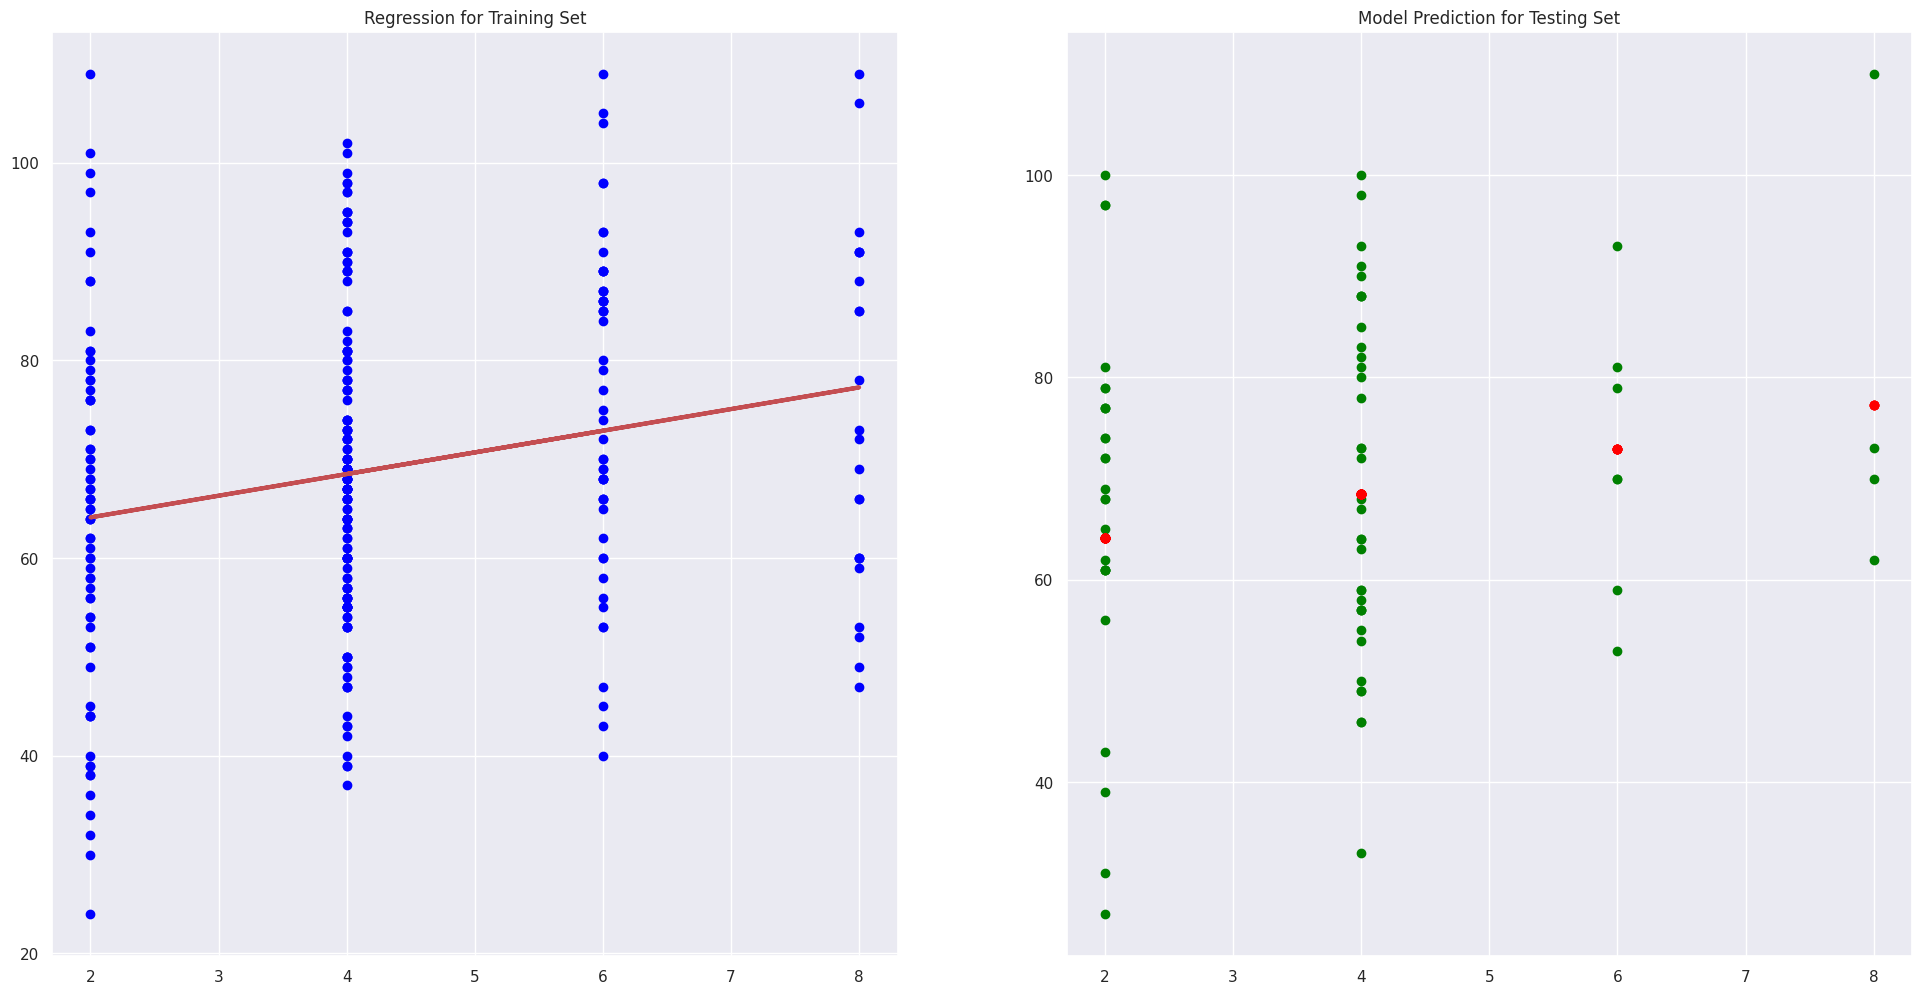

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.049462958298140514
Mean Squared Error (MSE) 	: 264.92543738986825

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.00417191982651266
Mean Squared Error (MSE) 	: 289.1451206813739



In [33]:
lr(X='total_studytime', y='overall_grades', df=cleaned)

Model of "Failure" against "overall_grades":

Intercept 	: b =  [71.46835005]
Coefficients 	: a =  [[-7.15899919]]


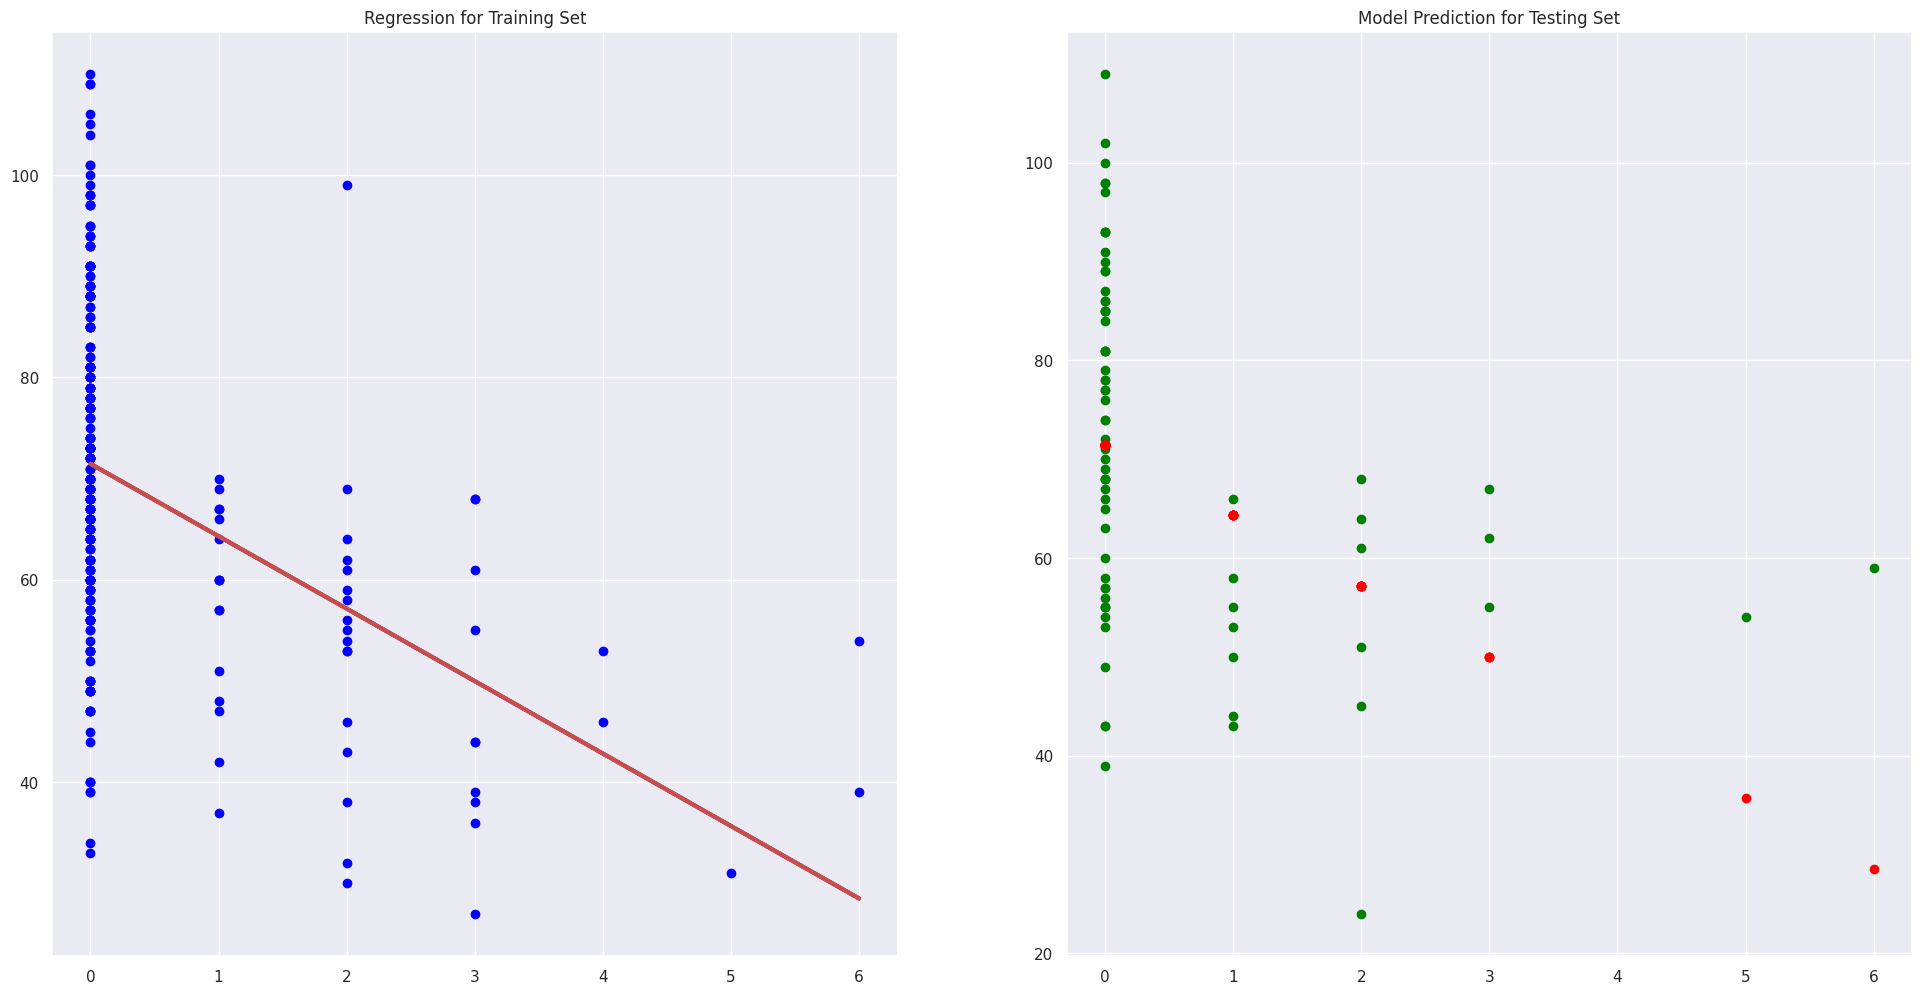

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.16847343582582563
Mean Squared Error (MSE) 	: 228.43703620039042

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.10981866013772157
Mean Squared Error (MSE) 	: 272.42214992111093



In [34]:
lr(X='total_failures', y='overall_grades', df=cleaned)

Model of "G1" against "overall_grades":

Intercept 	: b =  [-0.80036435]
Coefficients 	: a =  [[3.03976009]]


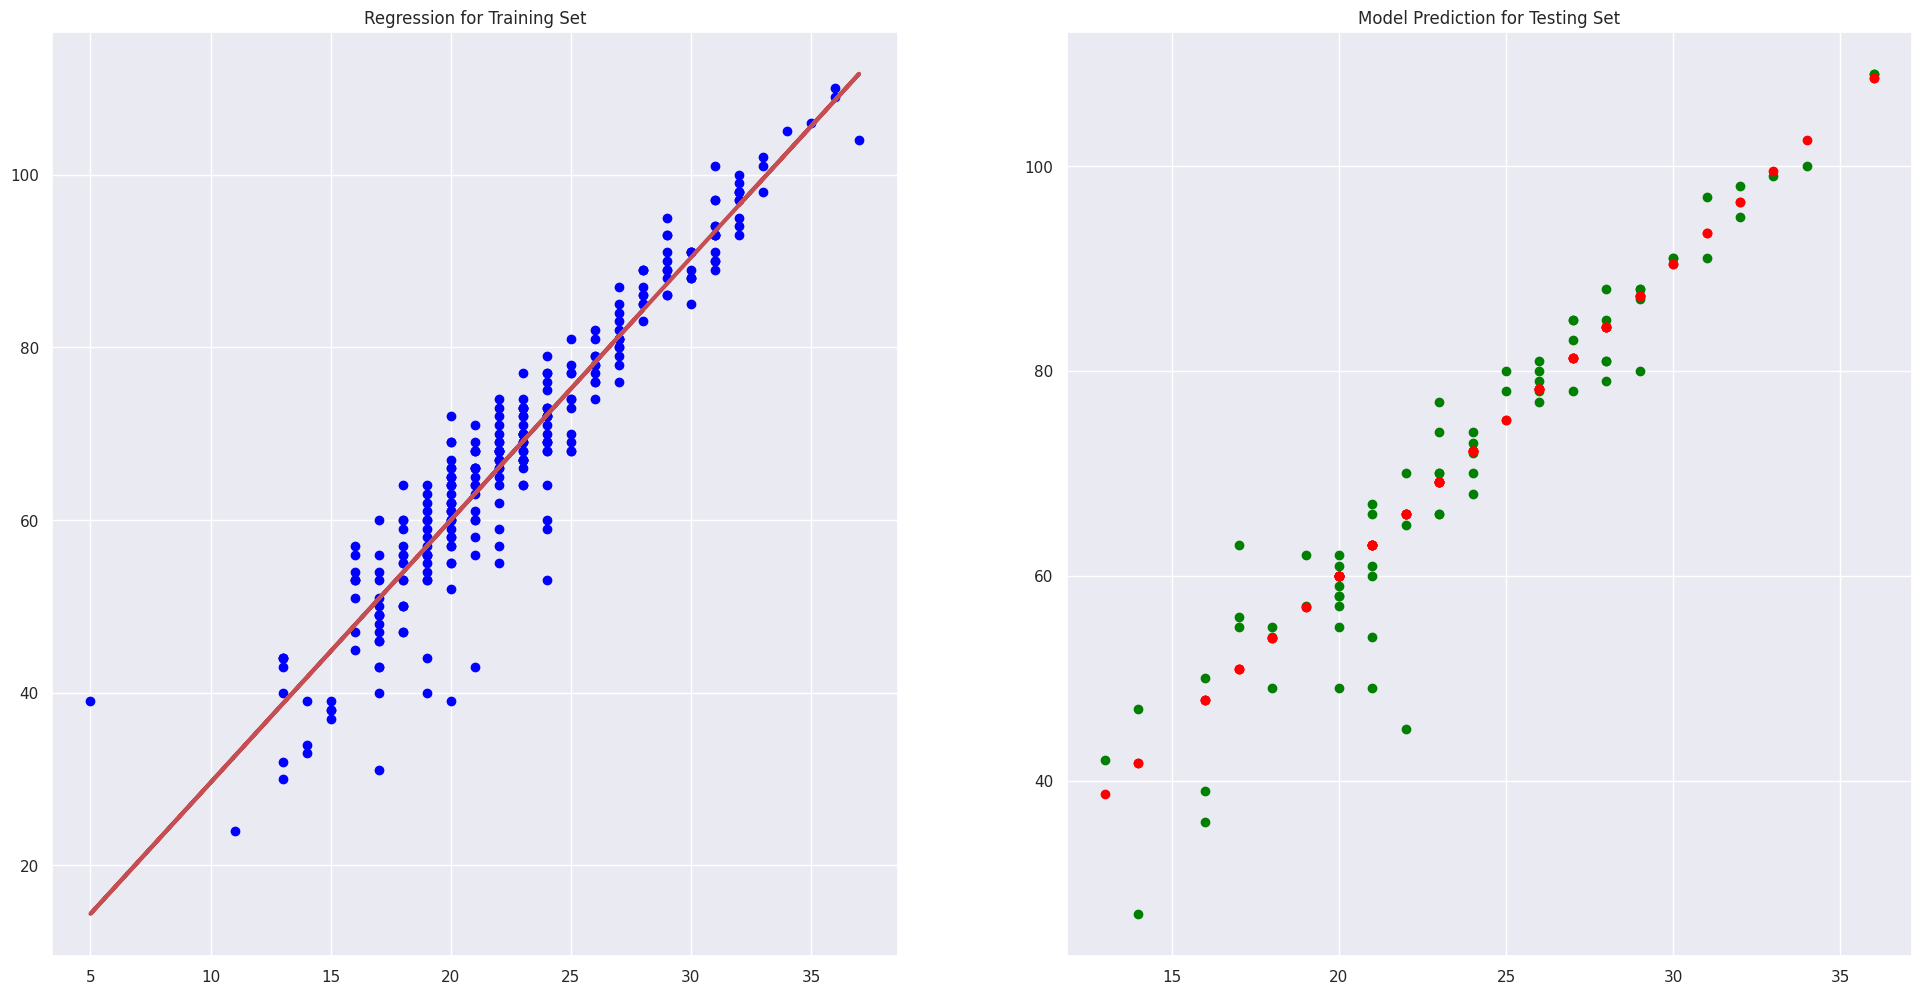

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9031643779582063
Mean Squared Error (MSE) 	: 26.802527481758275

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9070584160673053
Mean Squared Error (MSE) 	: 27.49368539471962



In [35]:
lr(X='total_grades_G1', y='overall_grades', df=cleaned)

Model of "G2" against "overall_grades":

Intercept 	: b =  [0.99473031]
Coefficients 	: a =  [[2.95486172]]


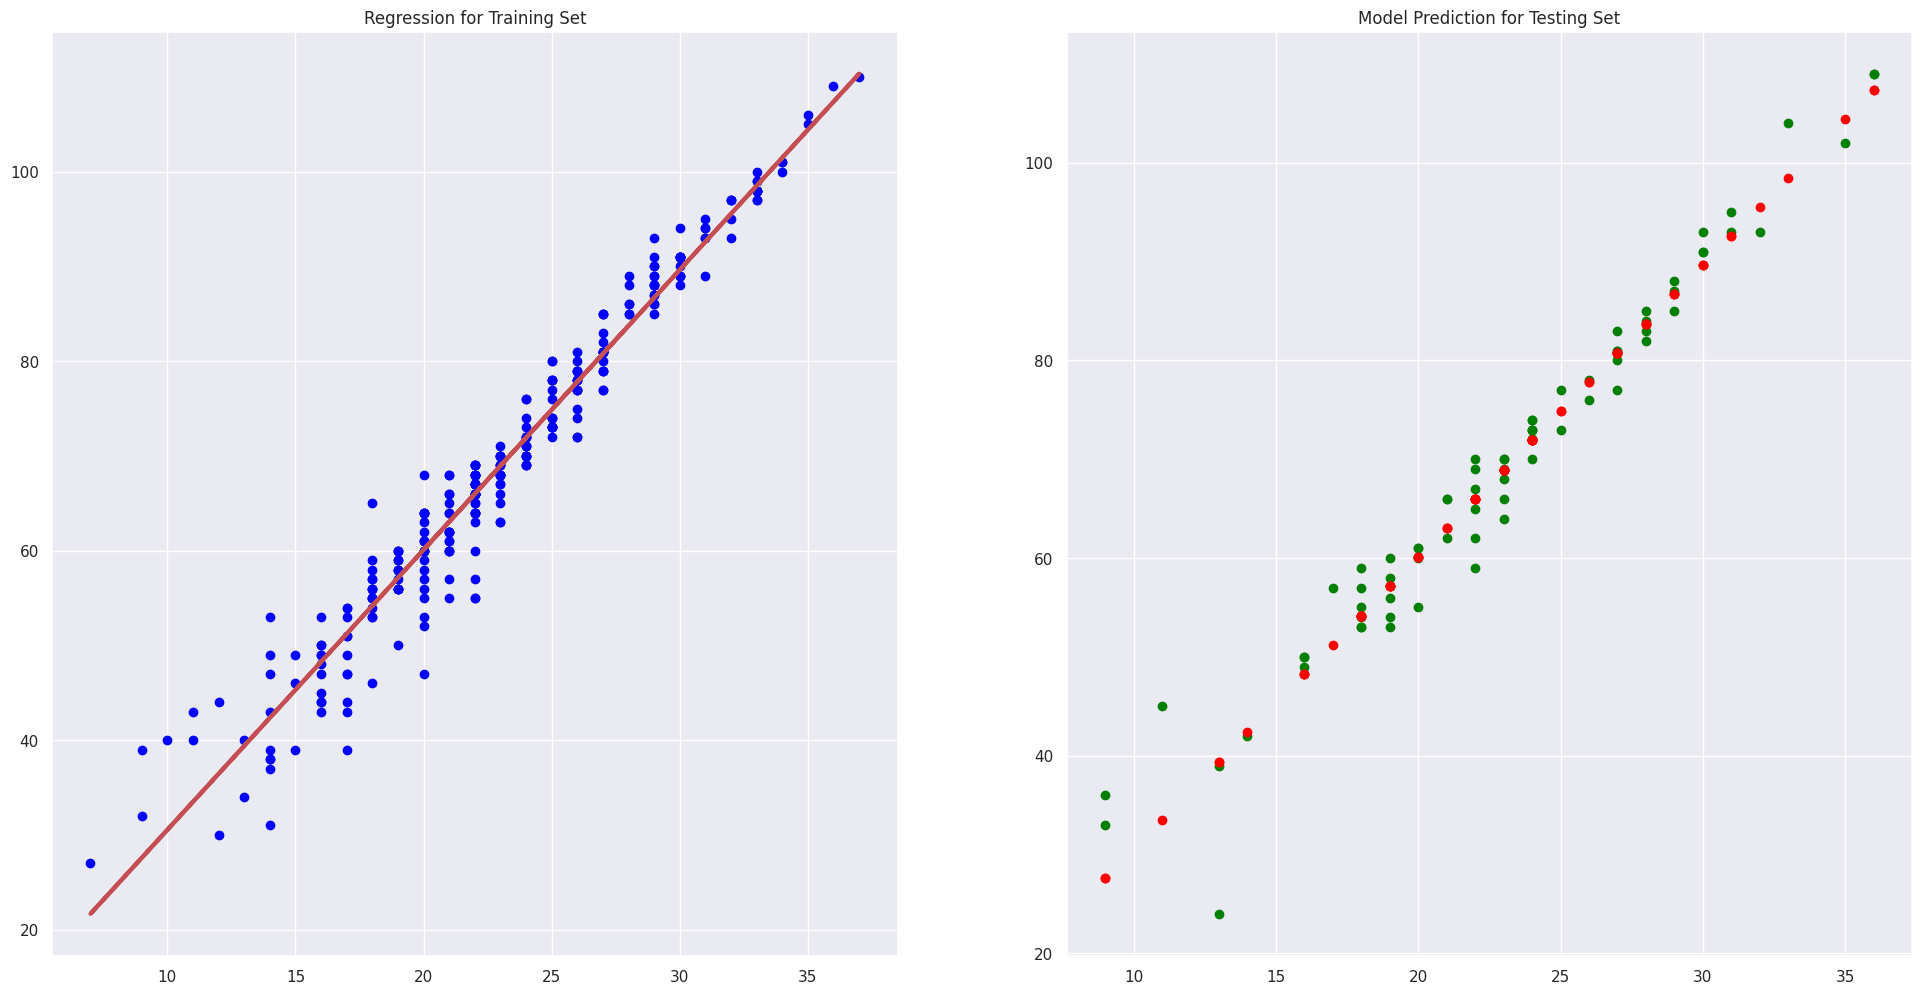

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9548190053727657
Mean Squared Error (MSE) 	: 12.477328915193882

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9603565771062618
Mean Squared Error (MSE) 	: 11.92059482911113



In [36]:
lr(X='total_grades_G2', y='overall_grades', df=cleaned)

Overall, based on the uni-variate linear regression models that we have plotted against "G3", we are able to clearly identify that the variables "failures", "G1" and "G2" can be used for predicting student's final grade "Total_Grades" using linear regression. 

The "G1" and "G2" models have high explained variance of 0.628 and 0.799 respectively. The graph also illustrates that the better an individual performs for "G1" and "G2", the better the final grades "G3". Overall, "G2" have a higher explained variance than "G1" and may imply a more accurate model for predicting the final grade "G3"

On the other hand, we could also observe that "failures" have a negative correlation with "Total_Grades". Intuitively by looking at the graph plotted, we could see that in general, higher frequency in 0 failed subjects will result in better "Total_Grades" scores. 

Lastly, the other 3 variables "Fedu", "Medu", "studytime" and "failures" did not fare particularly well, as expected from the low correlation value. Hence, we will not be using them for further exploration using linear regression.

#Next, we will be exploring another machine learning technique; 
Multi-variate linear regression

In [37]:
dataMATH = pd.DataFrame(cleaned)

In [38]:
dataMATH.columns

Index(['age', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'traveltime',
       'schoolsup', 'famsup', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'health', 'total_studytime',
       'total_failures', 'total_absences', 'total_paid', 'total_grades_G1',
       'total_grades_G2', 'total_grades_G3', 'total_grades_math',
       'total_grades_port', 'overall_grades', 'weekly', 'Pedu'],
      dtype='object')

In [39]:
#Drop the columns which is not essentials for grade prediction
dataMATH.drop(['famsize', 'Pstatus', 'Fjob', 'Mjob', 'total_studytime', 'total_failures','schoolsup','famsup', 'total_paid', 'nursery', 'internet', 'freetime', 'higher', 'health', 'total_grades_math', 'total_grades_port','age','address','total_grades_G1','total_grades_G2','total_grades_G3'], axis = 'columns', inplace = True)


In [40]:
#Columns left
dataMATH.columns

Index(['traveltime', 'activities', 'romantic', 'famrel', 'goout',
       'total_absences', 'overall_grades', 'weekly', 'Pedu'],
      dtype='object')

In [41]:
#Given the high correlation between different grades, drop G1 & G2
##dataMATH['G3'] = dataMATH['G1'] + dataMATH['G2'] + dataMATH['G3']
#combine weekdays alcohol consumption with weekend alcohol consumption
##dataMATH['Dalc'] = dataMATH['Dalc'] + dataMATH['Walc']
#combine mother's education with father's education & call it parent's education
##dataMATH['Pedu'] = dataMATH['Medu'] + dataMATH['Fedu']

##dataMATH = dataMATH.drop(columns=['Walc','Medu','Fedu','G1','G2'], axis=1)

In [42]:
#Getting dummies
dataMATH = pd.get_dummies(dataMATH, drop_first=True)
dataMATH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 369
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   traveltime      368 non-null    int64
 1   activities      368 non-null    int64
 2   romantic        368 non-null    int64
 3   famrel          368 non-null    int64
 4   goout           368 non-null    int64
 5   total_absences  368 non-null    int64
 6   overall_grades  368 non-null    int64
 7   weekly          368 non-null    int64
 8   Pedu            368 non-null    int64
dtypes: int64(9)
memory usage: 28.8 KB


In [43]:
# define target variable and training and test sets
Y = pd.DataFrame(dataMATH["overall_grades"])
X = pd.DataFrame(dataMATH.drop("overall_grades",axis=1))



# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=46)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (294, 1) (294, 8)
Test Set  : (74, 1) (74, 8)


<Axes: >

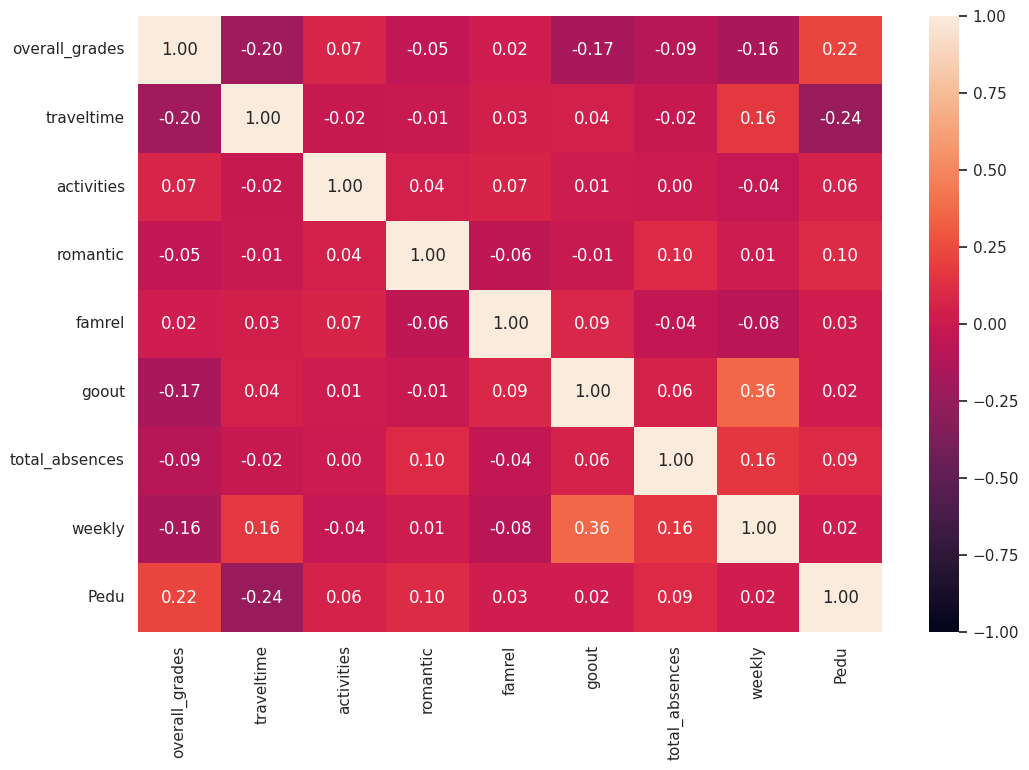

In [44]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [45]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression


# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])


Intercept of Regression 	: b =  [71.77847988]
Coefficients of Regression 	: a =  [[-3.25427033  1.99476334 -2.34111707  0.21272285 -2.00430139 -0.1306041
  -0.60918356  1.78065754]]



,Predictors,Coefficients
0,traveltime,-3.254270
1,activities,1.994763
2,romantic,-2.341117
3,famrel,0.212723
4,goout,-2.004301
5,total_absences,-0.130604
6,weekly,-0.609184
7,Pedu,1.780658


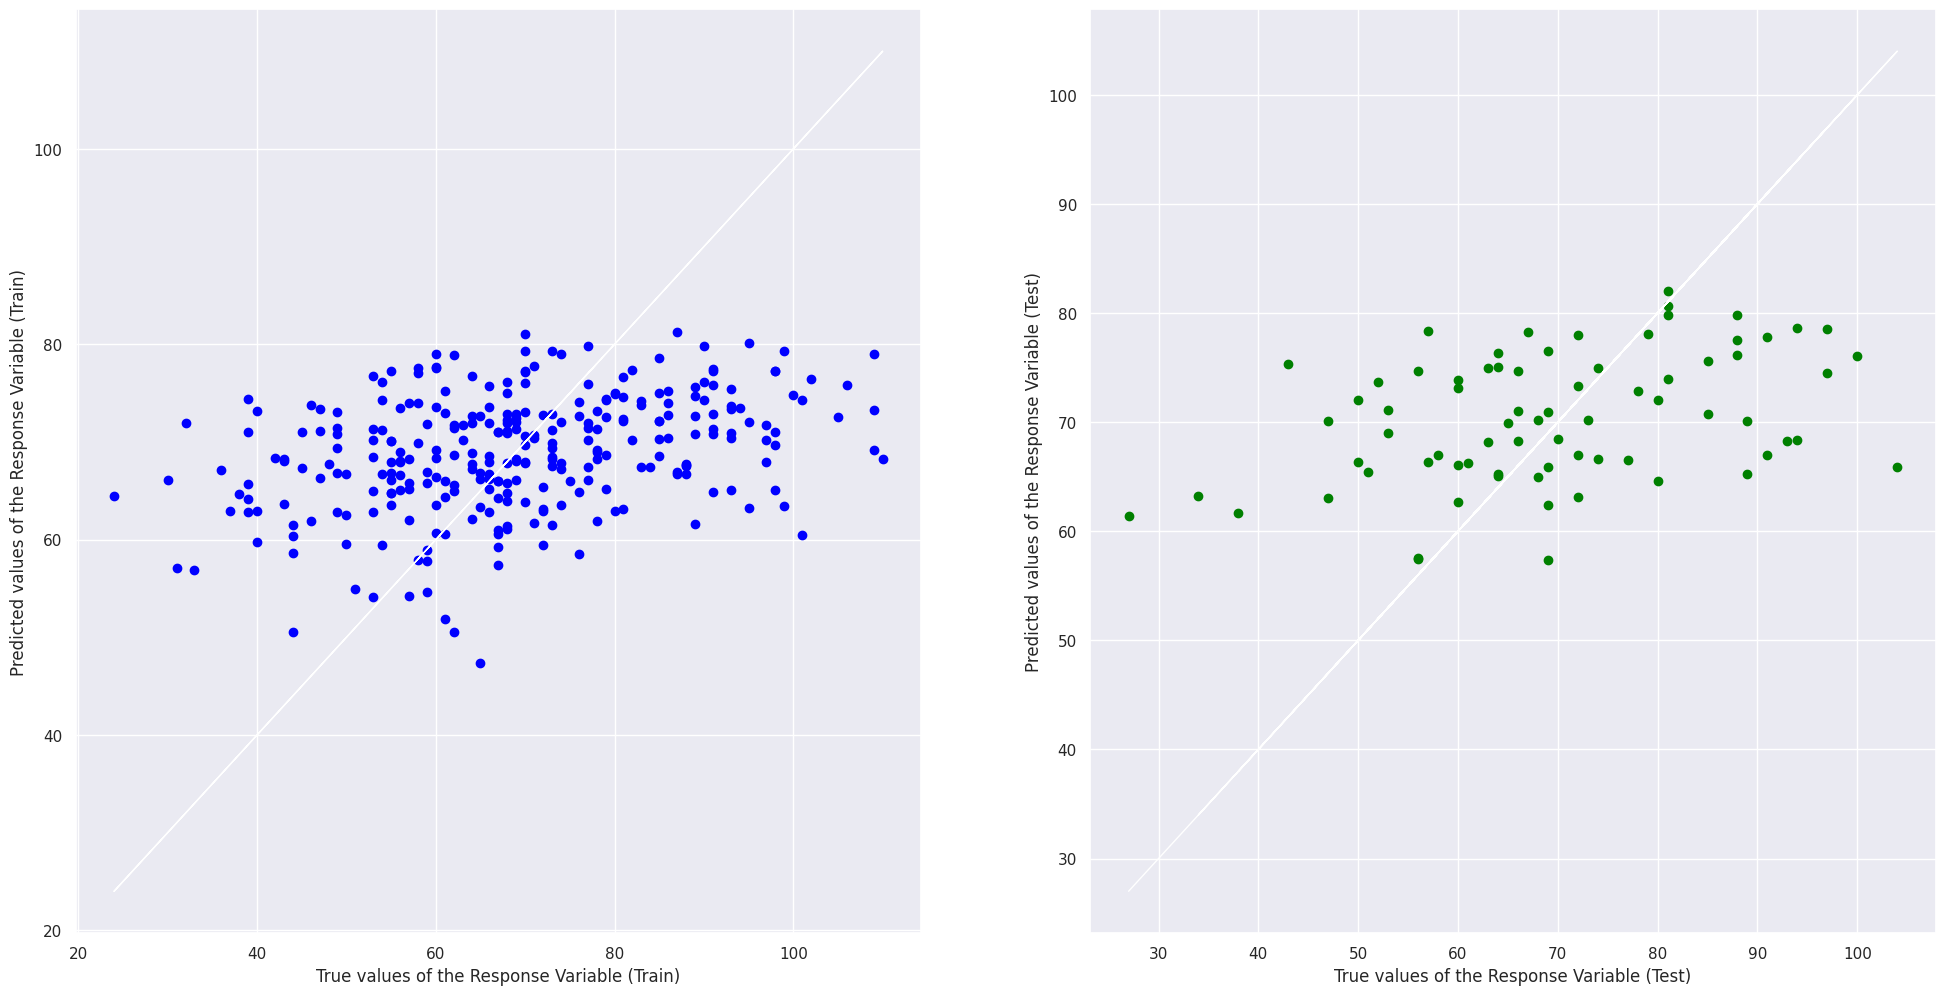

In [46]:
# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [47]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.12323366964013271
Mean Squared Error (MSE) 	: 251.61932840302885
Root Mean Squared Error (RMSE) 	: 15.862513306630474

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.15049097506415288
Mean Squared Error (MSE) 	: 218.69132979566993
Root Mean Squared Error (RMSE) 	: 14.788215909827322



# Machine Learning using Ordinary Least Squares

In [48]:
# Predicting the Test set results
y_pred = linreg.predict(X_test)
# Building Optimal Model using Backward Elimination
import statsmodels.api as sm
X_opt = pd.DataFrame(X)
X_opt = sm.add_constant(X_opt)
regressor_OLS = sm.OLS(Y, X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_grades   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     6.753
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           2.94e-08
Time:                        11:48:19   Log-Likelihood:                -1533.9
No. Observations:                 368   AIC:                             3086.
Df Residuals:                     359   BIC:                             3121.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             70.8660      5.252     13.493      0.000      60.537      81.195
traveltime        -2.6115      1.223     -2.135      0.033      -5.017      -0.206
activities         1.8803      1.673      1.124      0.262      -1.409       5.170
romantic          -3.3179      1.782     -1.862      0.063      -6.822       0.187
famrel            -0.1153      0.926     -0.125      0.901      -1.936       1.705
goout             -1.8425      0.801     -2.301      0.022      -3.417      -0.268
total_absences    -0.1476      0.077     -1.907      0.057      -0.300       0.005
weekly            -0.6156      0.474     -1.299      0.195      -1.548       0.317
Pedu               1.9909      0.435      4.579      0.000       1.136       2.846
==============================================================================
Omnibus:                        1.401   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.496   Jarque-Bera (JB):                1.394
Skew:                           0.073   Prob(JB):                        0.498
Kurtosis:                       2.736   Cond. No.                         98.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#Backward Eliminiation Process
#Drop the variable which is not significant(p>0.05)
X_opt = X.drop(['activities', 'total_absences','weekly'], axis = 'columns')
X_opt = sm.add_constant(X_opt)
import statsmodels.api as sm
regressor_OLS = sm.OLS(Y, X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_grades   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     9.113
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           3.54e-08
Time:                        11:48:19   Log-Likelihood:                -1537.9
No. Observations:                 368   AIC:                             3088.
Df Residuals:                     362   BIC:                             3111.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.0269      5.260     13.314      0.000      59.684      80.370
traveltime    -2.8647      1.212     -2.363      0.019      -5.249      -0.480
romantic      -3.5445      1.785     -1.986      0.048      -7.054      -0.035
famrel         0.2678      0.917      0.292      0.770      -1.535       2.071
goout         -2.3768      0.741     -3.208      0.001      -3.834      -0.920
Pedu           1.9896      0.434      4.589      0.000       1.137       2.842
==============================================================================
Omnibus:                        1.882   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.390   Jarque-Bera (JB):                1.752
Skew:                           0.080   Prob(JB):                        0.416
Kurtosis:                       2.702   Cond. No.                         49.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_opt, Y, test_size = 0.2, random_state=46)
# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)



Train Set : (294, 1) (294, 6)
Test Set  : (74, 1) (74, 6)


<Axes: >

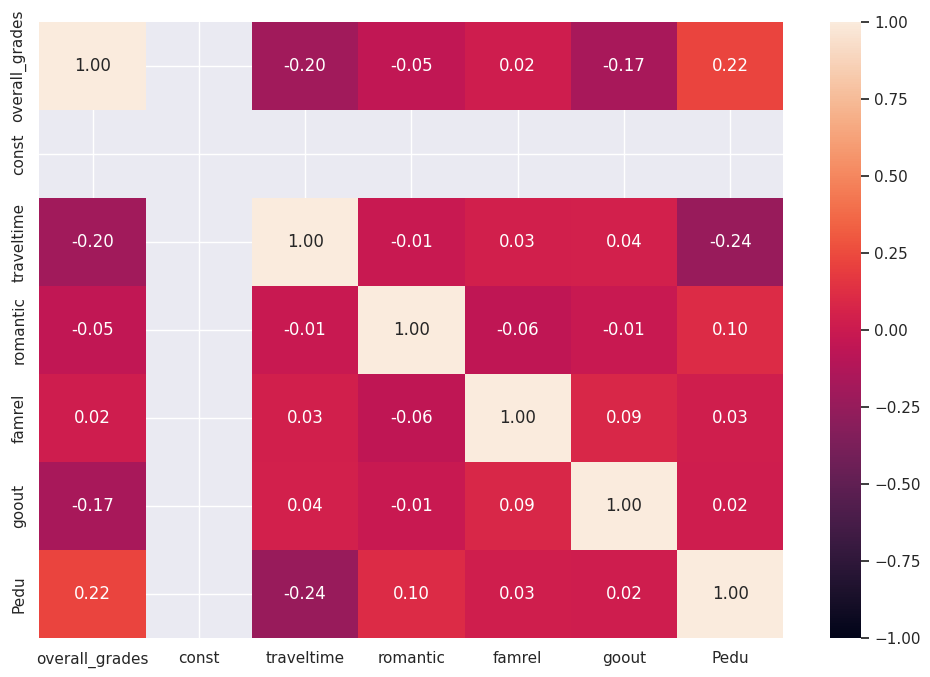

In [51]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [52]:
# Import LinearRegression model from Scikit-Learn
#Building a new regression model without variable which are not significant
from sklearn.linear_model import LinearRegression


# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])


Intercept of Regression 	: b =  [71.65125563]
Coefficients of Regression 	: a =  [[ 0.         -3.55778124 -2.5416902   0.52409407 -2.4803068   1.71128524]]



,Predictors,Coefficients
0,const,0.000000
1,traveltime,-3.557781
2,romantic,-2.541690
3,famrel,0.524094
4,goout,-2.480307
5,Pedu,1.711285


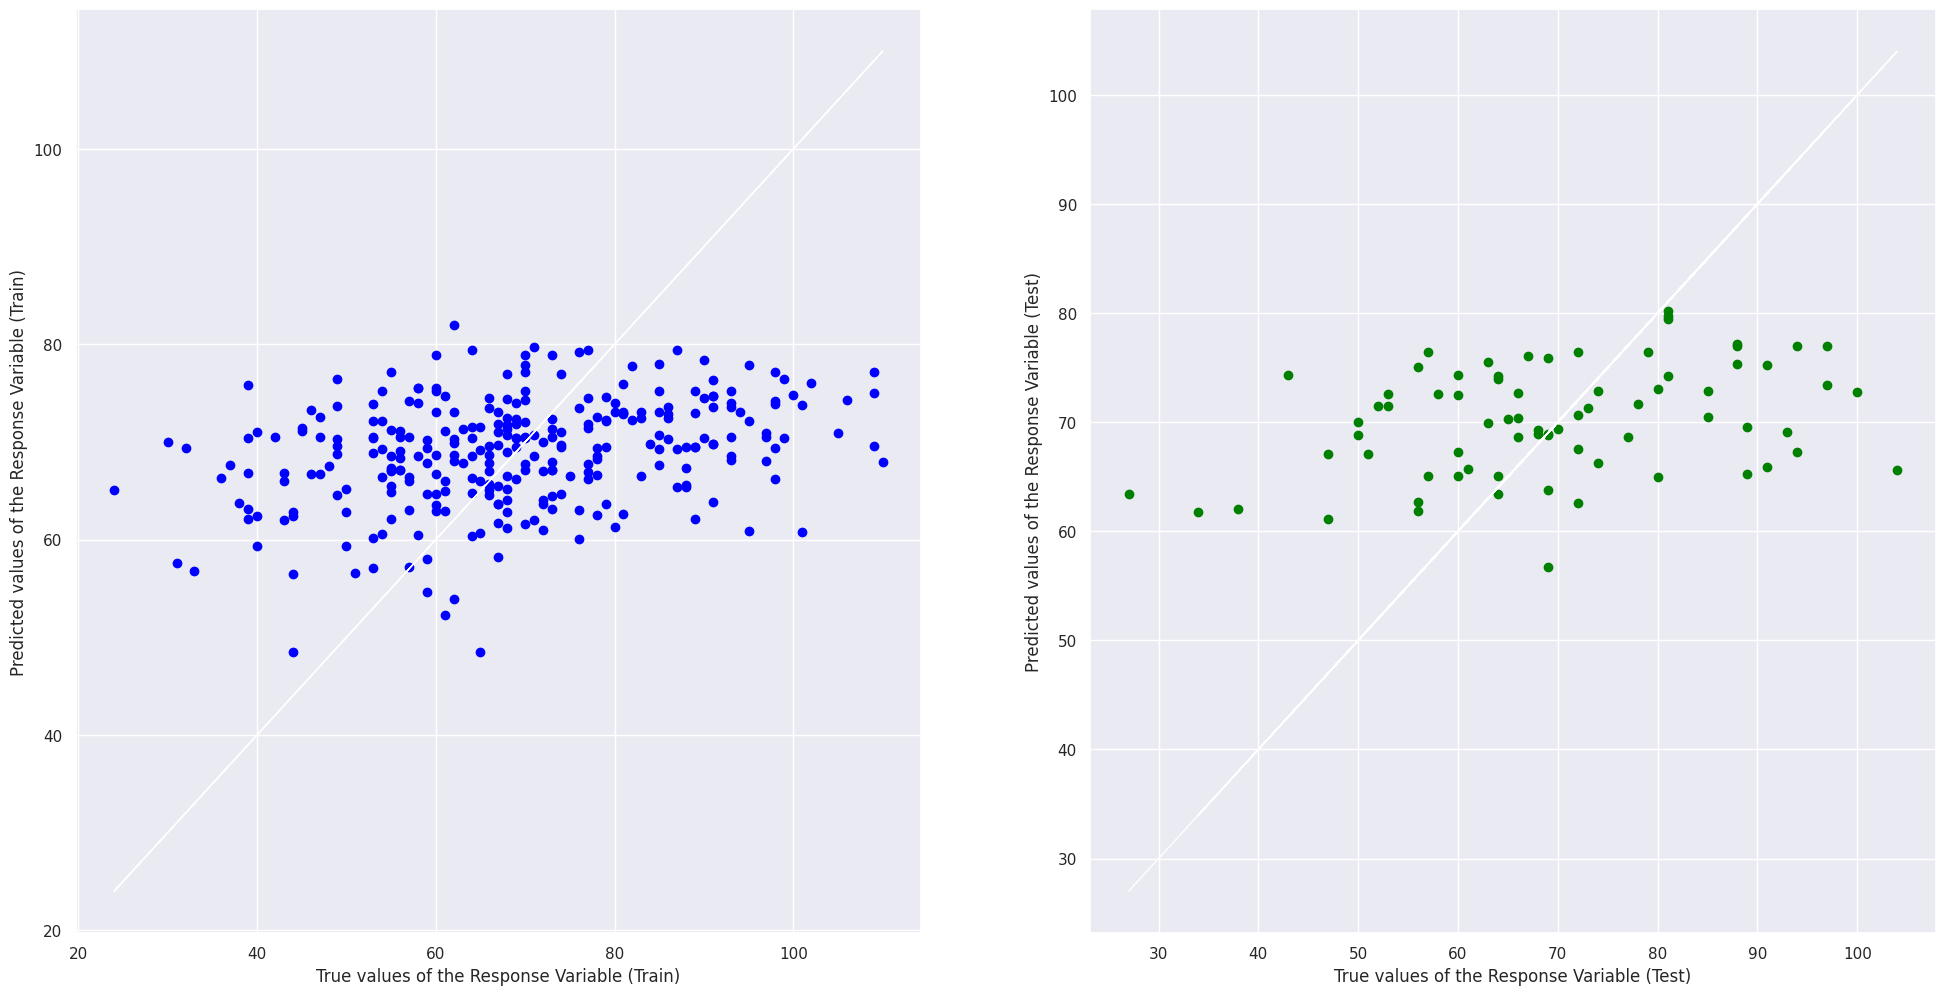

In [53]:
# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [54]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.1060367849703081
Mean Squared Error (MSE) 	: 256.55458700205554
Root Mean Squared Error (RMSE) 	: 16.0173214677753

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.1225845203100564
Mean Squared Error (MSE) 	: 225.87536141972117
Root Mean Squared Error (RMSE) 	: 15.029150389151116



In [55]:
dataMATH = pd.read_csv('/content/gdrive/My Drive/SC1015/student-mat.csv')

In [56]:
from sklearn.model_selection import train_test_split

#Use one-hot encoding
onehot = dataMATH.replace({'GT3':1, 'LE3':0,
                        'U':1,'R':0,
                       'A':0,'T':1,
                       'no':0,'yes':1,
                       'M':0,'F':1})

onehot.drop({'school','Mjob','Fjob','reason','guardian',
              'nursery','Medu','Fedu','famrel','traveltime'},inplace = True, axis = 1)
rfdf = onehot.copy()
# rfdf = pd.get_dummies(data)
rfdf['G3'].astype(int)
X=rfdf.drop('G3',axis = 1)
y=rfdf['G3']
y.info
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_test.shape

(119,)

# Machine Learning using Random Forest Classifier

In [57]:
#Import Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor

#Create a random forest classifier object, choosing 1000 trees because 
reg=RandomForestRegressor(n_estimators=1000)

#fit the dataset into the object
reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [58]:
pred_G3 = reg.predict(X_test)
pred_G3
error = np.sum(pred_G3 - y_test)**2/y_test.shape[0]
error
# pd.DataFrame(pred_G3,y_test)

0.7461590672268907

In [59]:
#Create a feature importance chart, which gives us the contribution of each variable in determining the G3 predition using Random Forest.
imp = pd.DataFrame(reg.feature_importances_, index=X.columns, columns=["Feature Importance"])
imp = imp.sort_values('Feature Importance', ascending = False)
imp.T

,G2,absences,age,health,G1,freetime,studytime,goout,Walc,activities,...,failures,paid,romantic,Dalc,sex,internet,famsize,address,Pstatus,higher
Feature Importance,0.773152,0.112968,0.022808,0.014479,0.014442,0.012801,0.008849,0.008407,0.006175,0.003486,...,0.002958,0.002723,0.001937,0.001724,0.001497,0.001347,0.001332,0.001168,0.000945,0.000411
